# Comparison of Machine Learning Classification Algorithms on Synthetic Data

## Objective

The purpose of this notebook is to compare the performance of several classification algorithms using synthetic datasets generated with sklearn.

The classifiers evaluated include:

- Naive Bayes
- Logistic Regression
- Quadratic Discriminant Analysis (QDA)
- Support Vector Machine (RBF kernel)
- Decision Tree
- K-Nearest NeigIors (K=1)

We will create four synthetic datasets with different characteristics to observe how each classifier performs under different conditions.

Each dataset will be split into training and testing sets. We will evaluate performance using classification reports and visualizations of decision boundaries.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

I import all necessary libraries for data generation, visualization, model training, and evaluation.

## Dataset 1: Well-Separated Blobs

This dataset contains two clearly separated classes. All classifiers should perform very well on this dataset.

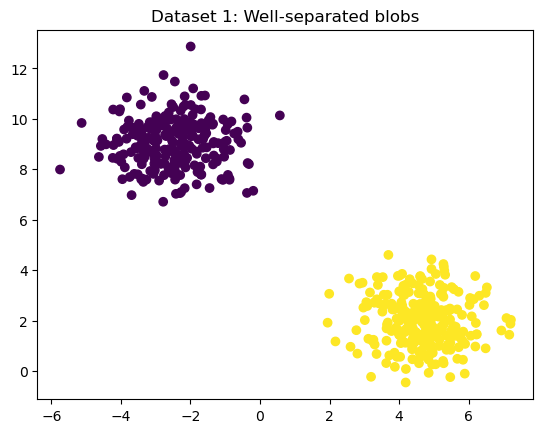

In [39]:
X1, y1 = make_blobs(
    n_samples=500,
    centers=2,
    n_features=2,
    cluster_std=1.0,
    random_state=42
)

plt.scatter(X1[:,0], X1[:,1], c=y1)
plt.title("Dataset 1: Well-separated blobs")
plt.show()

## Training and Testing Split

I split the dataset into training and testing sets to evaluate performance properly.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.3, random_state=42
)

In [47]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "SVM RBF": SVC(kernel="rbf"),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1)
}

In [49]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    print(f"--- {name} ---")

    print("Training Performance:")
    print(classification_report(y_train, clf.predict(X_train)))

    print("Testing Performance:")
    print(classification_report(y_test, clf.predict(X_test)))

    print()

--- Naive Bayes ---
Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       170

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

Testing Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        80

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


--- Logistic Regression ---
Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       170

    accuracy                           1.00       350
   macro avg  

## Dataset 2: Nonlinear Circular Data

This dataset consists of two concentric circles. This creates a nonlinear decision boundary.

Logistic Regression, which creates linear decision boundaries, should perform poorly.

Quadratic Discriminant Analysis (QDA), SVM with RBF kernel, Decision Tree, and KNN should perform much better.

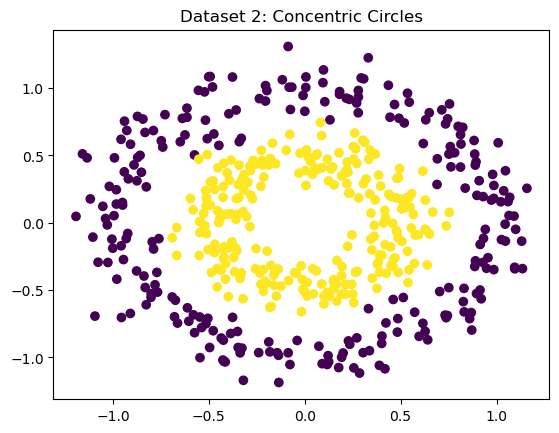

In [52]:
from sklearn.datasets import make_circles

X2, y2 = make_circles(
    n_samples=500,
    noise=0.1,
    factor=0.5,
    random_state=42
)

plt.figure()
plt.scatter(X2[:,0], X2[:,1], c=y2)
plt.title("Dataset 2: Concentric Circles")
plt.show()

## Training and Evaluation on Dataset 2

I split the dataset into training and testing sets and evaluate all classifiers.

I expect Logistic Regression to perform poorly due to the nonlinear boundary.

In [56]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=42
)

for name, clf in classifiers.items():

    clf.fit(X2_train, y2_train)

    print(f"=== {name} ===")

    print("Training Performance:")
    print(classification_report(y2_train, clf.predict(X2_train)))

    print("Testing Performance:")
    print(classification_report(y2_test, clf.predict(X2_test)))

    print()

=== Naive Bayes ===
Training Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       175
           1       0.99      0.96      0.98       175

    accuracy                           0.98       350
   macro avg       0.98      0.98      0.98       350
weighted avg       0.98      0.98      0.98       350

Testing Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      0.95      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


=== Logistic Regression ===
Training Performance:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       175
           1       0.51      0.53      0.52       175

    accuracy                           0.51       350
   macro avg  